# Multi-Class Prediction of Cirrhosis Outcomes
----------------------------------------------------------------

## Overview

    Welcome to the 2023 Kaggle Playground Series! Thank you to everyone who participated in and contributed to Season 3 Playground Series so far. This is our last episode for the Season 3 and we wish you all a Happy New Year! Stay tuned for the new season next year!

    Your Goal: For this Episode of the Series, your task is to use a multi-class approach to predict the the outcomes of patients with cirrhosis. Good luck!

## Evaluation

    Submissions are evaluated using the multi-class logarithmic loss. Each id in the test set had a single true class label, Status. For each id, you must submit a set of predicted probabilities for each of the three possible outcomes, e.g., Status_C, Status_CL, and Status_D.

## Submission File
    For each id row in the test set, you must predict probabilities of the three outcomes Status_C, Status_CL, and Status_D .
    The file should contain a header and have the following format:

        id,Status_C,Status_CL,Status_D
    7905,0.628084,0.034788,0.337128
    7906,0.628084,0.034788,0.337128
    7907,0.628084,0.034788,0.337128
    etc.

## Timeline
    Start Date - December 5, 2023
    Entry Deadline - Same as the Final Submission Deadline
    Team Merger Deadline - Same as the Final Submission Deadline
    Final Submission Deadline - January 1, 2024

## Citation
    - https://www.kaggle.com/competitions/playground-series-s3e26/rules

    @misc{playground-series-s3e26,
        author = {Walter Reade, Ashley Chow},
        title = {Multi-Class Prediction of Cirrhosis Outcomes},
        publisher = {Kaggle},
        year = {2023},
        url = {https://kaggle.com/competitions/playground-series-s3e26}
    }

## Dataset Description
    The dataset for this competition (both train and test) was generated from a deep learning model trained on the Cirrhosis Patient Survival Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

    Files
    train.csv - the training dataset; Status is the categorical target; C (censored) indicates the patient was alive at N_Days, CL indicates the patient was alive at N_Days due to liver a transplant, and D indicates the patient was deceased at N_Days.
    test.csv - the test dataset; your objective is to predict the probability of each of the three Status values, e.g., Status_C, Status_CL, Status_D.
    sample_submission.csv - a sample submission file in the correct format

## 1. Data set 준비하기

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Pandas Library로 csv 파일 읽어들이기

In [28]:
# pd.read_csv()로 csv파일 읽어들이기
train_org = pd.read_csv('../data/train.csv')
test_org = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

In [29]:
train_org

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,7900,1166,D-penicillamine,16839,F,N,N,N,N,0.8,309.0,3.56,38.0,1629.0,79.05,224.0,344.0,9.9,2.0,C
7901,7901,1492,Placebo,17031,F,N,Y,N,N,0.9,260.0,3.43,62.0,1440.0,142.00,78.0,277.0,10.0,4.0,C
7902,7902,1576,D-penicillamine,25873,F,N,N,Y,S,2.0,225.0,3.19,51.0,933.0,69.75,62.0,200.0,12.7,2.0,D
7903,7903,3584,D-penicillamine,22960,M,N,Y,N,N,0.7,248.0,2.75,32.0,1003.0,57.35,118.0,221.0,10.6,4.0,D


## Step 2. EDA 및 데이터 기초 통계 분석

### 데이터프레임의 각 컬럼 분석하기

In [30]:
print(train_org.head())
print(test_org.head())

   id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0 

In [31]:
train_org.info()
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [32]:
train_org.describe()
test_org.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000
mean,10540.000000,2038.696642,18497.756782,2.600389,352.486435,3.538071,84.701679,1811.233314,113.587526,115.286094,264.023715,10.632865,3.036995
std,1521.750965,1086.843490,3583.898801,3.852395,200.438989,0.354886,77.542064,1935.351492,48.964789,52.602780,87.584068,0.792711,0.856030
min,7905.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,9222.500000,1234.000000,15730.000000,0.700000,248.000000,3.350000,39.000000,823.000000,75.000000,84.000000,209.000000,10.000000,2.000000
50%,10540.000000,1882.000000,18806.000000,1.100000,299.000000,3.570000,65.000000,1142.000000,106.950000,104.000000,259.000000,10.600000,3.000000
75%,11857.500000,2692.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1838.500000,137.950000,138.000000,317.000000,11.000000,4.000000
max,13175.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,15.200000,4.000000


In [33]:
train_org.isnull().sum()
test_org.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

### 범주형 변수 Label encoder

In [34]:
from sklearn.preprocessing import LabelEncoder

# Identify object-type columns
object_columns = train_org.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert object-type columns to numerical using Label Encoding
for col in object_columns:
    train_org[col] = label_encoder.fit_transform(train_org[col])
    
# Convert object-type columns to numerical using Label Encoding
# Identify object-type columns
object_columns1 = test_org.select_dtypes(include=['object']).columns
for col1 in object_columns1:
    test_org[col1] = label_encoder.fit_transform(test_org[col1]) 

c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dt

In [35]:
# 인코딩 후의 train 데이터 확인
train_org.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,0,21532,1,0,0,0,0,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,2
1,1,2574,1,19237,0,0,0,0,0,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,0
2,2,3428,1,13727,0,0,1,1,2,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,2
3,3,2576,1,18460,0,0,0,0,0,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,0
4,4,788,1,16658,0,0,1,0,0,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,0


In [36]:
# 인코딩 후의 test 데이터 확인
test_org.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,0,19724,0,0,1,0,0,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,0,14975,0,0,0,0,0,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,1,13149,0,0,1,0,2,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,0,20510,0,0,0,0,0,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,0,21904,0,0,1,0,0,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


In [37]:
train_org.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [38]:
train_org.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [39]:
train_org.dtypes

id                 int64
N_Days             int64
Drug               int32
Age                int64
Sex                int32
Ascites            int32
Hepatomegaly       int32
Spiders            int32
Edema              int32
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status             int32
dtype: object

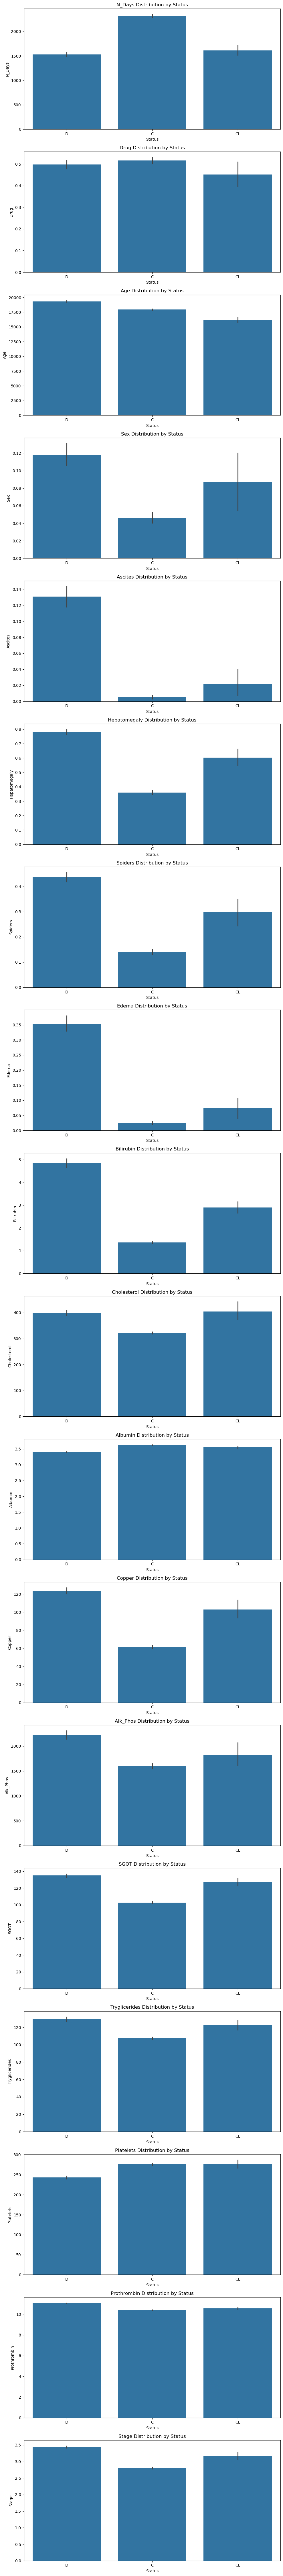

In [52]:

# 그래프를 그릴 변수 목록
variables = [ 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# 서브플롯 설정
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(10, 5 * len(variables)))

for i, var in enumerate(variables):
    sns.barplot(data=train_org, x='Status', y=var, ax=axes[i])
    axes[i].set_title(f'{var} Distribution by Status')

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_36976\721698298.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_org, x='Status', y=var, ax=axes[i, 1], palette=palette)
C:\Users\user\AppData\Local\Temp\ipykernel_36976\721698298.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_org, x='Status', y=var, ax=axes[i, 1], palette=palette)
C:\Users\user\AppData\Local\Temp\ipykernel_36976\721698298.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_org, x='Status', y=var, ax=axes[i, 1], palette=palette)
C:\Users\u

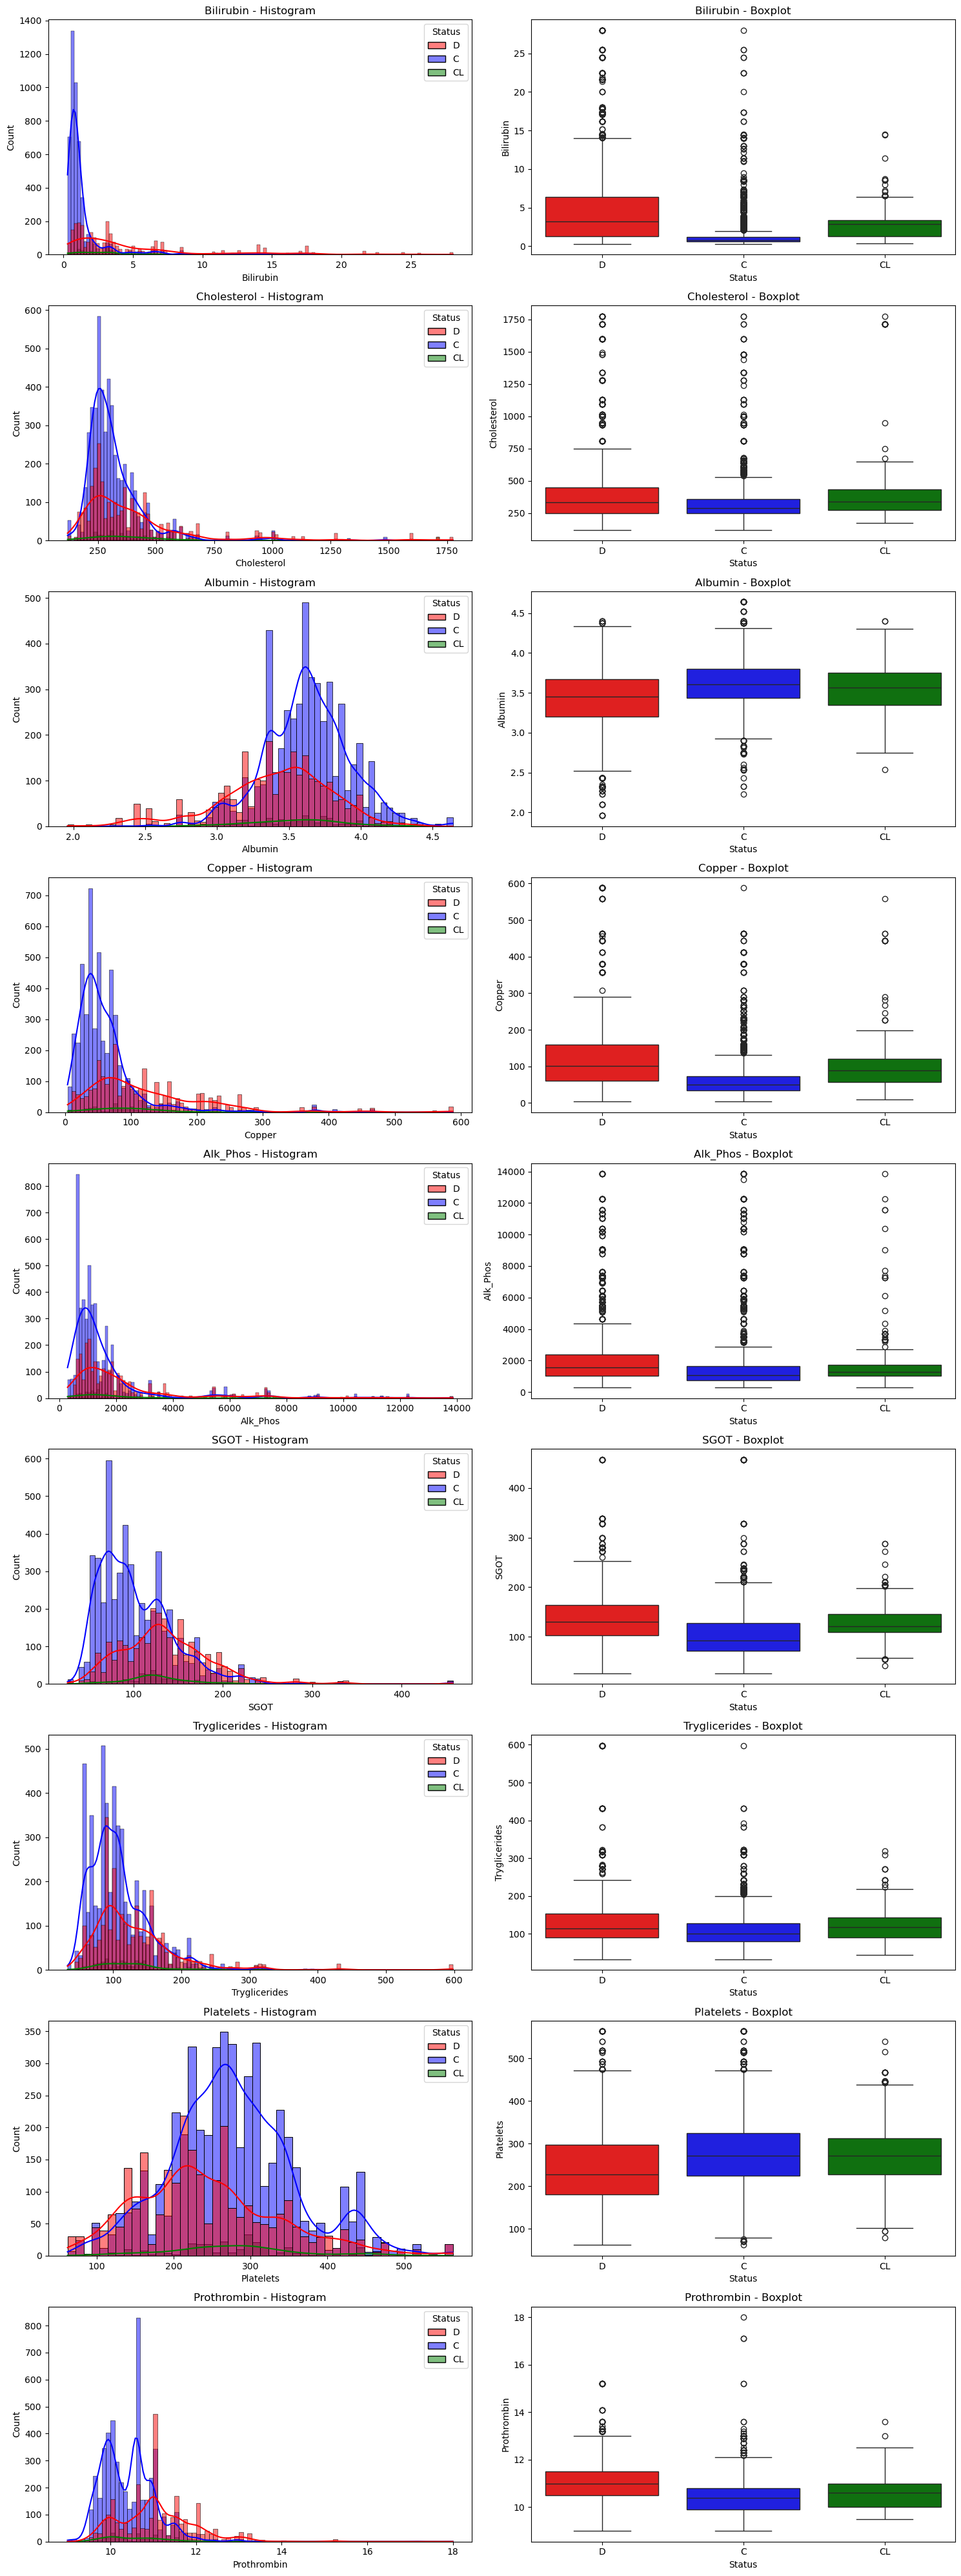

In [40]:
# 변수 리스트
variables = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 서브플롯 설정
fig, axes = plt.subplots(len(variables), 2, figsize=(15, 40))

# 색상 팔레트 설정
palette = {"C": "blue", "CL": "green", "D": "red"}

# 'Status' 열을 문자열로 다시 매핑
reverse_status_mapping = {0: 'C', 1: 'CL', 2: 'D'}
train_org['Status'] = train_org['Status'].map(reverse_status_mapping)

for i, var in enumerate(variables):
    # 히스토그램
    sns.histplot(data=train_org, x=var, hue='Status', kde=True, ax=axes[i, 0], palette=palette)
    axes[i, 0].set_title(f'{var} - Histogram')
    
    # 박스플롯
    sns.boxplot(data=train_org, x='Status', y=var, ax=axes[i, 1], palette=palette)
    axes[i, 1].set_title(f'{var} - Boxplot')

plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_36976\226121595.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=train_org, x=f'log_{var}', hue='Status', kde=True, ax=axes[i, 0], palette=palette)


ValueError: `dataset` input should have multiple elements.

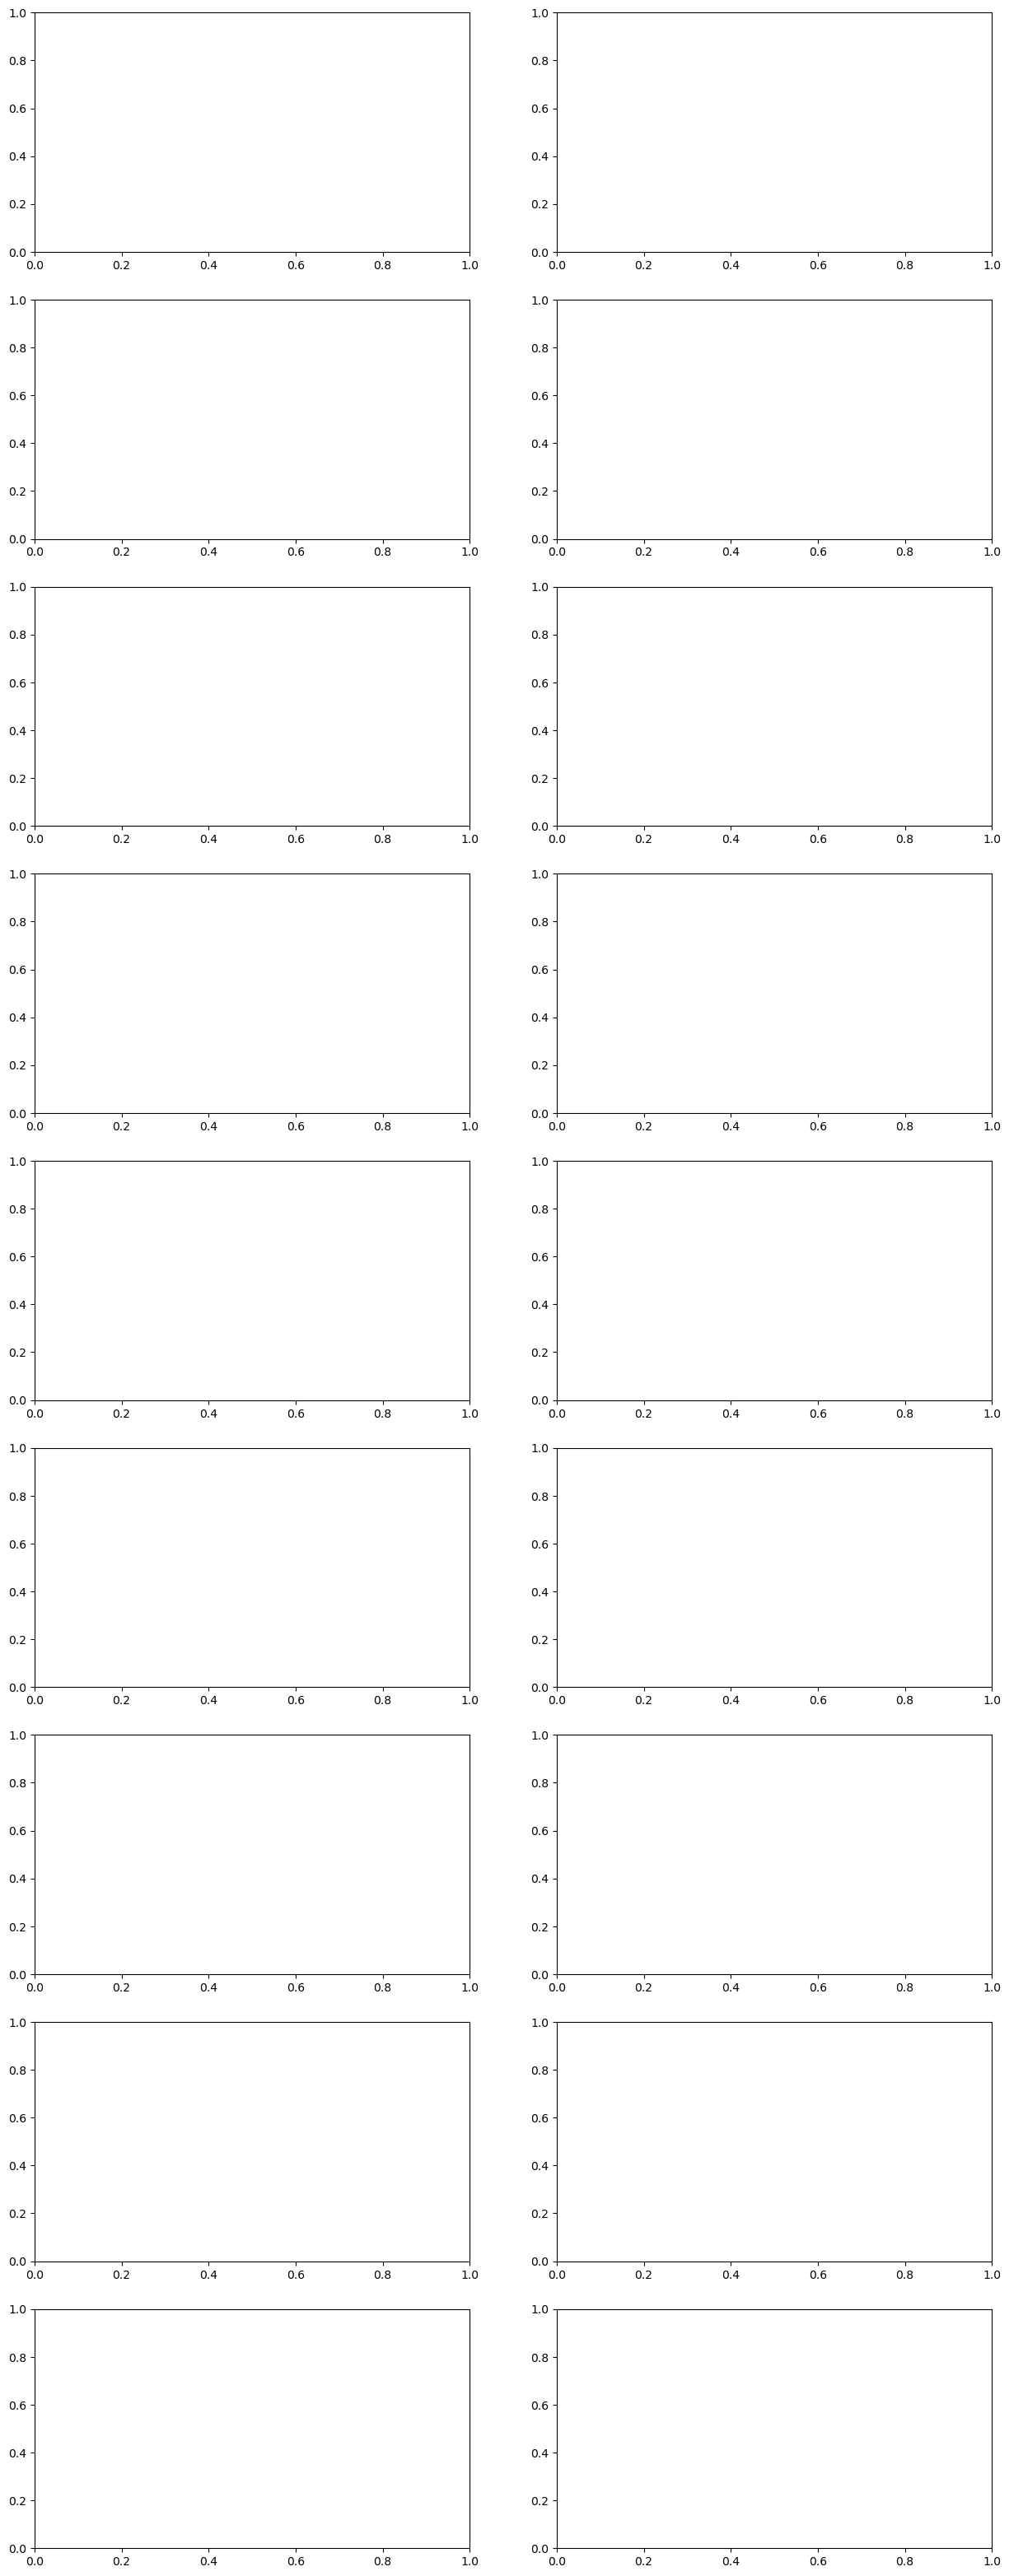

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 변수 리스트
variables = ['Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# 서브플롯 설정
fig, axes = plt.subplots(len(variables), 2, figsize=(15, 40))

# 'Status' 열을 문자열로 다시 매핑
reverse_status_mapping = {0: 'C', 1: 'CL', 2: 'D'}
train_org['Status'] = train_org['Status'].map(reverse_status_mapping)

# 색상 팔레트 설정
palette = {"C": "blue", "CL": "green", "D": "red"}

for i, var in enumerate(variables):
    # 데이터에 log1p 변환 적용
    train_org[f'log_{var}'] = np.log1p(train_org[var])
    
    # 히스토그램
    sns.histplot(data=train_org, x=f'log_{var}', hue='Status', kde=True, ax=axes[i, 0], palette=palette)
    axes[i, 0].set_title(f'Log Transformed {var} - Histogram')
    
    # 박스플롯
    sns.boxplot(data=train_org, x='Status', y=f'log_{var}', ax=axes[i, 1], palette=palette)
    axes[i, 1].set_title(f'Log Transformed {var} - Boxplot')

plt.tight_layout()
plt.show()


In [47]:
train_org.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

## 3. 모델 학습을 위한 데이터 전처리

### StandardScaler를 이용하여 데이터 전처리하기

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
train_org.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status'],
      dtype='object')

In [46]:
test_org.columns

Index(['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [47]:
# train 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
train_X_num = train_org[[ 'N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin' ]]
train_X_cat = train_org[[ 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage' ]]
train_y = train_org['Status']

In [48]:
# test 수치형 입력 데이터, 범주형 입력 데이터, 출력 데이터로 구분하기
test_X_num = test_org[[ 'N_Days', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin' ]]
test_X_cat = test_org[[ 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage' ]]

In [49]:
train_X_num.head()

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,999,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7
1,2574,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0
2,3428,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7
3,2576,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7
4,788,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6


In [50]:
train_X_cat.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
0,0,21532,1,0,0,0,0,3.0
1,1,19237,0,0,0,0,0,3.0
2,1,13727,0,0,1,1,2,4.0
3,1,18460,0,0,0,0,0,3.0
4,1,16658,0,0,1,0,0,4.0


In [51]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(train_X_num)
train_X_scaled = scaler.transform(train_X_num)

# Numpy Data인 X_scaled 데이터를 Data Frame 으로 바꿔주는 작업
train_X_scaled = pd.DataFrame(data=train_X_scaled, index=train_X_num.index, columns=train_X_num.columns)
train_X = pd.concat([train_X_scaled, train_X_cat], axis=1)

c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [52]:
# 수치형 입력 데이터를 전처리하고 입력 데이터 통합하기
scaler = StandardScaler()
scaler.fit(test_X_num)
test_X_scaled = scaler.transform(test_X_num)

# Numpy Data인 X_scaled 데이터를 Data Frame 으로 바꿔주는 작업
test_X_scaled = pd.DataFrame(data=test_X_scaled, index=test_X_num.index, columns=test_X_num.columns)
test_X = pd.concat([test_X_scaled, test_X_cat], axis=1)

c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [53]:
train_X.head()

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
0,-0.942430,-0.077237,-0.176908,-0.572940,1.160785,-0.113334,1.336304,-0.996442,1.472341,-1.189049,0,21532,1,0,0,0,0,3.0
1,0.497025,-0.444429,0.068784,-0.024043,-0.275420,-0.197909,0.414968,-0.520497,1.095026,0.474024,1,19237,0,0,0,0,0,3.0
2,1.277529,0.185043,-0.263923,0.004846,0.620561,-0.413812,0.097266,-1.243933,-0.757248,1.369525,1,13727,0,0,1,1,2,4.0
3,0.498852,-0.523113,-0.484022,-0.139601,-0.341301,-0.086017,-0.887610,-0.368194,0.043117,0.090238,1,18460,0,0,0,0,0,3.0
4,-1.135271,-0.391973,-0.023351,0.293739,-0.275420,-0.333965,0.224347,-0.368194,0.374697,-0.037691,1,16658,0,0,1,0,0,4.0


### train data와 val data 분리하기

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.3, random_state=1, shuffle=True)

In [56]:
X_train

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
2687,-1.159033,-0.129693,0.386135,-0.428494,0.739147,-0.223649,0.478508,-0.025514,-1.866326,2.137097,1,25873,0,0,1,1,0,4.0
6005,-0.801683,-0.575569,-0.632461,0.091514,-0.789291,-0.535685,-0.483821,0.088713,0.260359,-1.061120,0,22546,0,0,1,0,0,2.0
4631,-0.077843,-0.418201,-0.212738,0.524853,-0.657529,-0.316629,0.891521,-0.273005,0.500469,-1.189049,0,14705,0,0,0,0,0,3.0
7231,-1.185538,0.814515,0.601115,-0.139601,1.753714,-0.267775,1.431614,0.469469,0.146021,-0.421477,1,14899,0,0,0,0,0,3.0
5954,0.018120,-0.444429,0.048309,0.293739,-0.143658,0.719286,-0.411057,0.735998,0.043117,-1.189049,1,20284,0,0,1,1,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,-0.341058,0.630919,6.395339,-0.428494,-0.117306,0.440871,-0.665219,1.116754,-0.963057,0.346095,0,19270,0,0,1,1,0,4.0
5192,-1.042049,0.158815,-0.386769,-1.064058,0.396566,-0.337642,-0.093355,-0.463383,-0.745814,-0.805263,1,16374,0,0,0,1,0,2.0
3980,-0.299930,-0.391973,-0.013113,1.564868,-0.117306,-0.562475,0.110589,0.450431,0.340396,-1.189049,0,18806,0,0,0,0,0,3.0
235,0.572882,-0.496885,-0.586393,0.322628,-0.328125,-0.217345,-0.506368,-0.558572,2.604287,-1.061120,0,11058,0,0,1,1,0,3.0


In [57]:
X_val

,N_Days,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage
325,-0.544866,-0.418201,-0.248568,-2.306298,-0.341301,-0.147479,-1.459474,-0.063589,0.729145,0.474024,1,14754,0,1,0,1,0,3.0
4497,0.949425,-0.496885,-0.176908,-0.197379,0.488799,-0.361806,-0.893759,0.107751,2.055465,-0.037691,1,18719,0,0,0,0,0,2.0
3798,-1.075865,6.007659,0.038072,0.004846,1.780066,0.342112,1.781087,1.706926,-1.306070,1.113668,1,21699,0,0,1,0,0,3.0
5069,0.505250,1.548899,-0.187145,1.391532,-0.657529,-0.280908,-1.110002,3.858197,0.203190,0.985739,1,18393,0,0,1,0,0,2.0
2379,-0.545780,-0.418201,0.119969,-0.544051,0.027632,-0.025606,4.386243,0.336204,-0.334198,0.346095,1,19379,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5823,1.638535,-0.418201,-0.571038,0.640411,-0.090953,0.031653,-0.347517,-0.273005,0.534770,-0.549406,0,18499,0,0,1,0,0,3.0
6386,0.864428,-0.549341,-0.837203,0.553743,-0.565296,-0.401730,0.129036,-0.939328,-0.002618,0.474024,0,14872,0,0,1,0,0,4.0
4080,-0.446161,-0.155921,-0.146196,-0.832944,0.488799,-0.370211,0.049098,0.241015,0.203190,-0.805263,1,12369,1,0,1,0,0,3.0
3249,1.663211,-0.444429,-0.207619,-0.515161,-0.143658,-0.613956,0.129036,0.050637,0.843483,-0.037691,0,14812,1,0,0,0,0,3.0


## 4. Classification 모델 학습하기

### Logistic Regression 모델 생성/학습하기

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(train_X, train_y)

c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

LogisticRegression(max_iter=1000)

In [60]:
from sklearn.metrics import classification_report

In [61]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1479
           1       0.00      0.00      0.00        82
           2       0.73      0.64      0.68       811

    accuracy                           0.78      2372
   macro avg       0.51      0.51      0.51      2372
weighted avg       0.75      0.78      0.76      2372



c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

### XGBoost 모델 생성/학습하기

In [62]:
from xgboost import XGBClassifier

In [63]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### 모델 학습 결과 평가하기

In [64]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1479
           1       0.69      0.22      0.33        82
           2       0.77      0.74      0.75       811

    accuracy                           0.81      2372
   macro avg       0.77      0.62      0.65      2372
weighted avg       0.81      0.81      0.81      2372



c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dt

### feature importance 확인하기

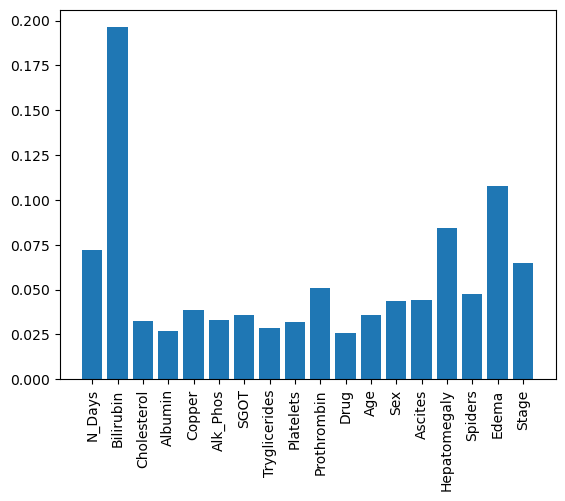

In [65]:
# XGBClassifier 모델의 feature_importances_를 이용하여 중요도 plot

# plt.plot(model_xgb.feature_importances_)
plt.bar(train_X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## 5. 모델 학습 결과 심화 분석하기

### Precision-Recall 커브 확인하기

In [66]:
from sklearn.metrics import roc_curve, RocCurveDisplay, auc
import matplotlib.pyplot as plt

c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\user\anaconda3\envs\KDY\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dt

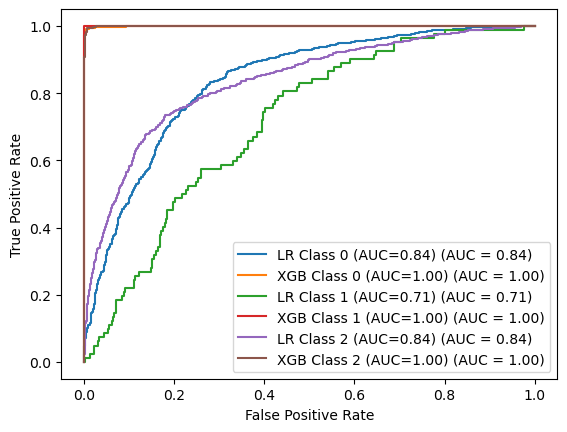

In [67]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# 클래스를 이진 형식으로 변환
y_bin = label_binarize(y_val, classes=np.unique(train_y))

# One-vs-Rest 방식을 사용한 다중 클래스 분류기 생성
ovr_lr = OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_xgb = OneVsRestClassifier(XGBClassifier())

# 모델 훈련 및 예측 확률 계산
ovr_lr.fit(train_X, train_y)
y_scores_lr = ovr_lr.predict_proba(X_val)

ovr_xgb.fit(train_X, train_y)
y_scores_xgb = ovr_xgb.predict_proba(X_val)

# 각 클래스에 대한 ROC 곡선 계산 및 그리기
fig, ax = plt.subplots()

for i in range(y_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_scores_lr[:, i])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax, name=f"LR Class {i} (AUC={roc_auc:.2f})")

    fpr, tpr, _ = roc_curve(y_bin[:, i], y_scores_xgb[:, i])
    roc_auc = auc(fpr, tpr)
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot(ax=ax, name=f"XGB Class {i} (AUC={roc_auc:.2f})")

plt.legend()
plt.show()


### Test data 에 적용

In [71]:
# XGBoost 모델을 사용하여 테스트 데이터에 대한 예측 수행
test_predictions = model_xgb.predict(test_X)

# 예측 결과를 'C', 'CL', 'DL'로 변환
status_map = {0: 'C', 1: 'CL', 2: 'D'}
test_predictions_mapped = [status_map[pred] for pred in test_predictions]

# sample_submission.csv 파일을 불러오기
submission = pd.read_csv('../data/sample_submission.csv')

# 'Status' 열에 변환된 예측 결과 넣기
submission['Status'] = test_predictions_mapped

# 결과를 submission_ver1.csv 파일로 저장
submission.to_csv('../data/submission_ver1.csv', index=False)